# || CAR SPEED DETECTION ||

# Task 1: Problem Identification and Data Gathering

## **Objective**: Our project aims to detect and track vehicles in real-time using YOLO, calculate their speed, and flag those exceeding the speed limit as violators. The system will display vehicle speed and violations on the video feed and generate a summary of speeding incidents to aid in traffic monitoring and enforcement.

## **Problem**: We developed a simulator similar to the "Saher" system, which automatically detects and tracks speeding cars in real time using video analysis. This improves the efficiency of speed monitoring and helps reduce accidents caused by speeding violations.


# Trying a custom model

* Install the Libraries

In [ ]:
!pip install roboflow
!pip install opencv-python
!pip install ultralytics  # for YOLOv8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 24.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
from IPython import display
display.clear_output()

import cv2
import numpy as np
import time

# Task 2: Exploratory Data Analysis (EDA)

* Load the dataset

In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="----")
project = rf.workspace("alpha-kl3a6").project("yolov5-02")
version = project.version(7)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Yolov5-02-7 in yolov8:: 100%|██████████| 6060/6060 [00:03<00:00, 1638.73it/s]


* Image Preprocessing

In [ ]:
def preprocess_image(image_path, target_size=(640, 640)):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image to the target size (YOLOv8 default is 640x640)
    image_resized = cv2.resize(image, target_size)

    # Normalize the image (YOLOv8 uses normalization)
    image_normalized = image_resized / 255.0  # Scale pixel values to [0, 1]

    return image_normalized

In [ ]:
def preprocess_dataset(dataset_path):
    for image_file in os.listdir(dataset_path):
        image_path = os.path.join(dataset_path, image_file)

        if image_file.endswith(".jpg") or image_file.endswith(".png"):
            # Preprocess the image
            preprocessed_image = preprocess_image(image_path)

            # Example to save:
            save_path = os.path.join(dataset_path, "preprocessed_" + image_file)
            cv2.imwrite(save_path, (preprocessed_image * 255).astype(np.uint8))

# Task 3: Model Development

* train the model with the dataset

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=20

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Yolov5-02-7/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

* Save the model

In [ ]:
!zip -r /content/runs/detect/train2.zip /content/runs/detect/train2

  adding: content/runs/detect/train2/ (stored 0%)
  adding: content/runs/detect/train2/val_batch2_pred.jpg (deflated 10%)
  adding: content/runs/detect/train2/train_batch1652.jpg (deflated 13%)
  adding: content/runs/detect/train2/confusion_matrix.png (deflated 39%)
  adding: content/runs/detect/train2/val_batch1_labels.jpg (deflated 12%)
  adding: content/runs/detect/train2/train_batch2.jpg (deflated 7%)
  adding: content/runs/detect/train2/val_batch1_pred.jpg (deflated 12%)
  adding: content/runs/detect/train2/val_batch0_labels.jpg (deflated 10%)
  adding: content/runs/detect/train2/F1_curve.png (deflated 17%)
  adding: content/runs/detect/train2/confusion_matrix_normalized.png (deflated 37%)
  adding: content/runs/detect/train2/val_batch2_labels.jpg (deflated 10%)
  adding: content/runs/detect/train2/results.csv (deflated 84%)
  adding: content/runs/detect/train2/args.yaml (deflated 52%)
  adding: content/runs/detect/train2/events.out.tfevents.1725470562.2097eaf7c9b7.950.0 (deflated



---



# Task 2: Exploratory Data Analysis (EDA)

* Prepare the Video Capture

In [ ]:
# Open the input video
video_path = '/content/4K Video of Highway Traffic!.mp4'
cap = cv2.VideoCapture(video_path)

* the Video's Information

In [ ]:
width = int(cap.get(3))
height = int(cap.get(4))
fps = int(cap.get(5))

In [ ]:
width

640

In [ ]:
height

360

In [ ]:
fps

29

* Prepare the Video (To save the model later)

In [ ]:
output_path = '/content/output_video_SpeedingCounter.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))



---



# Task 3: Model Development

In [ ]:
# Load YOLO model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

In [ ]:
# Parameters
color = (0, 255, 0)
violation_color = (0, 0, 255)
thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5  # Adjust font scale for smaller resolution
font_thickness = 1
speed_threshold = 120
conversion_factor = 0.05  # Example conversion factor from pixels to meters
line_position_y = int(height * 0.7)

In [ ]:
# Dictionary to store the last positions of the objects
last_positions = {}

# Counter for speeding cars
speeding_cars_count = 0

fps = 29.0  # Based on video FPS
frame_height_meters = 50.0

# Real-world conversion factor
conversion_factor = frame_height_meters / height

* Cars Speed detection

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        break

    # Run the YOLO model for object detection and tracking
    results = model.track(frame, persist=True)

    # Get the current timestamp (in seconds)
    current_time = time.time()

    for result in results:
        for obj in result.boxes:
            bbox = obj.xyxy[0].cpu().numpy()  # Bounding box coordinates
            class_id = int(obj.cls[0].cpu().numpy()) if obj.cls is not None else -1  # Class ID
            conf = obj.conf[0].cpu().numpy() if obj.conf is not None else 0.0  # Confidence score
            obj_id = int(obj.id[0].cpu().numpy()) if obj.id is not None else -1  # Unique ID

            # Convert bbox coordinates to integers
            x1, y1, x2, y2 = map(int, bbox)

            # Calculate the center of the bounding box
            center_x = (x1 + x2) // 2
            center_y = (y1 + y2) // 2

            # Check if the car has crossed the horizontal line
            if center_y > line_position_y:
                if obj_id in last_positions:
                    prev_center_x, prev_center_y, prev_time = last_positions[obj_id]

                    # Calculate the distance traveled in pixels
                    distance_px = np.sqrt((center_x - prev_center_x) ** 2 + (center_y - prev_center_y) ** 2)

                    # Calculate the time elapsed (in seconds)
                    time_elapsed = current_time - prev_time

                    # Ensure time_elapsed is not too small to avoid division by zero
                    if time_elapsed > 0.0001:
                        # Convert pixel distance to meters
                        distance_meters = distance_px * conversion_factor

                        # Calculate speed in meters per second (m/s), then convert to km/h
                        speed_mps = distance_meters / time_elapsed
                        speed_kmh = speed_mps * 3.6  # Convert m/s to km/h

                        # Check if the speed exceeds the threshold (violation)
                        if speed_kmh > speed_threshold:
                            speeding_cars_count += 1

                            # Draw the speed on the frame with violation color
                            cv2.putText(frame, f'Speed: {int(speed_kmh)} km/h (Violation)', (x1, y1 - 30), font, font_scale, violation_color, font_thickness, cv2.LINE_AA)

                            # Draw the bounding box with red color for speeding cars (violators)
                            cv2.rectangle(frame, (x1, y1), (x2, y2), violation_color, thickness)
                        else:
                            # Draw the speed on the frame for non-violating cars
                            cv2.putText(frame, f'Speed: {int(speed_kmh)} km/h', (x1, y1 - 30), font, font_scale, color, font_thickness, cv2.LINE_AA)

                            # Draw the bounding box with default color for non-speeding cars
                            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)
                    else:
                        # If time_elapsed is too small, assume speed is zero
                        cv2.putText(frame, 'Speed: 0 km/h', (x1, y1 - 30), font, font_scale, color, font_thickness, cv2.LINE_AA)
                        cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)

                # Update the last position of the car with the current frame's center and time
                last_positions[obj_id] = (center_x, center_y, current_time)

            # Prepare the label
            label = f'ID: {obj_id} Class: {class_id} Conf: {conf:.2f}'

            # Put the label on the frame
            cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

    # Draw the speeding (violating) cars counter on the frame
    cv2.putText(frame, f'Speeding Violations: {speeding_cars_count}', (10, height - 40), font, font_scale, (255, 0, 0), font_thickness, cv2.LINE_AA)

    # Draw the horizontal line (speed detection line)
    cv2.line(frame, (0, line_position_y), (width, line_position_y), (255, 0, 0), 2)

    # Write the processed frame to the output video
    out.write(frame)

# Release the video capture and output writer
cap.release()
out.release()


Streaming output truncated to the last 5000 lines.
0: 384x640 1 vehicle, 13.1ms
Speed: 2.3ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 vehicle, 10.7ms
Speed: 1.3ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 vehicle, 10.7ms
Speed: 1.5ms preprocess, 10.7ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 vehicle, 14.5ms
Speed: 1.6ms preprocess, 14.5ms inference, 3.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 vehicle, 12.7ms
Speed: 1.6ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 vehicles, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 vehicles, 11.7ms
Speed: 3.3ms preprocess, 11.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 vehicle, 16.5ms
Speed: 1.3ms preprocess, 16.5



---



# Task 4: Model Evaluation and Selection

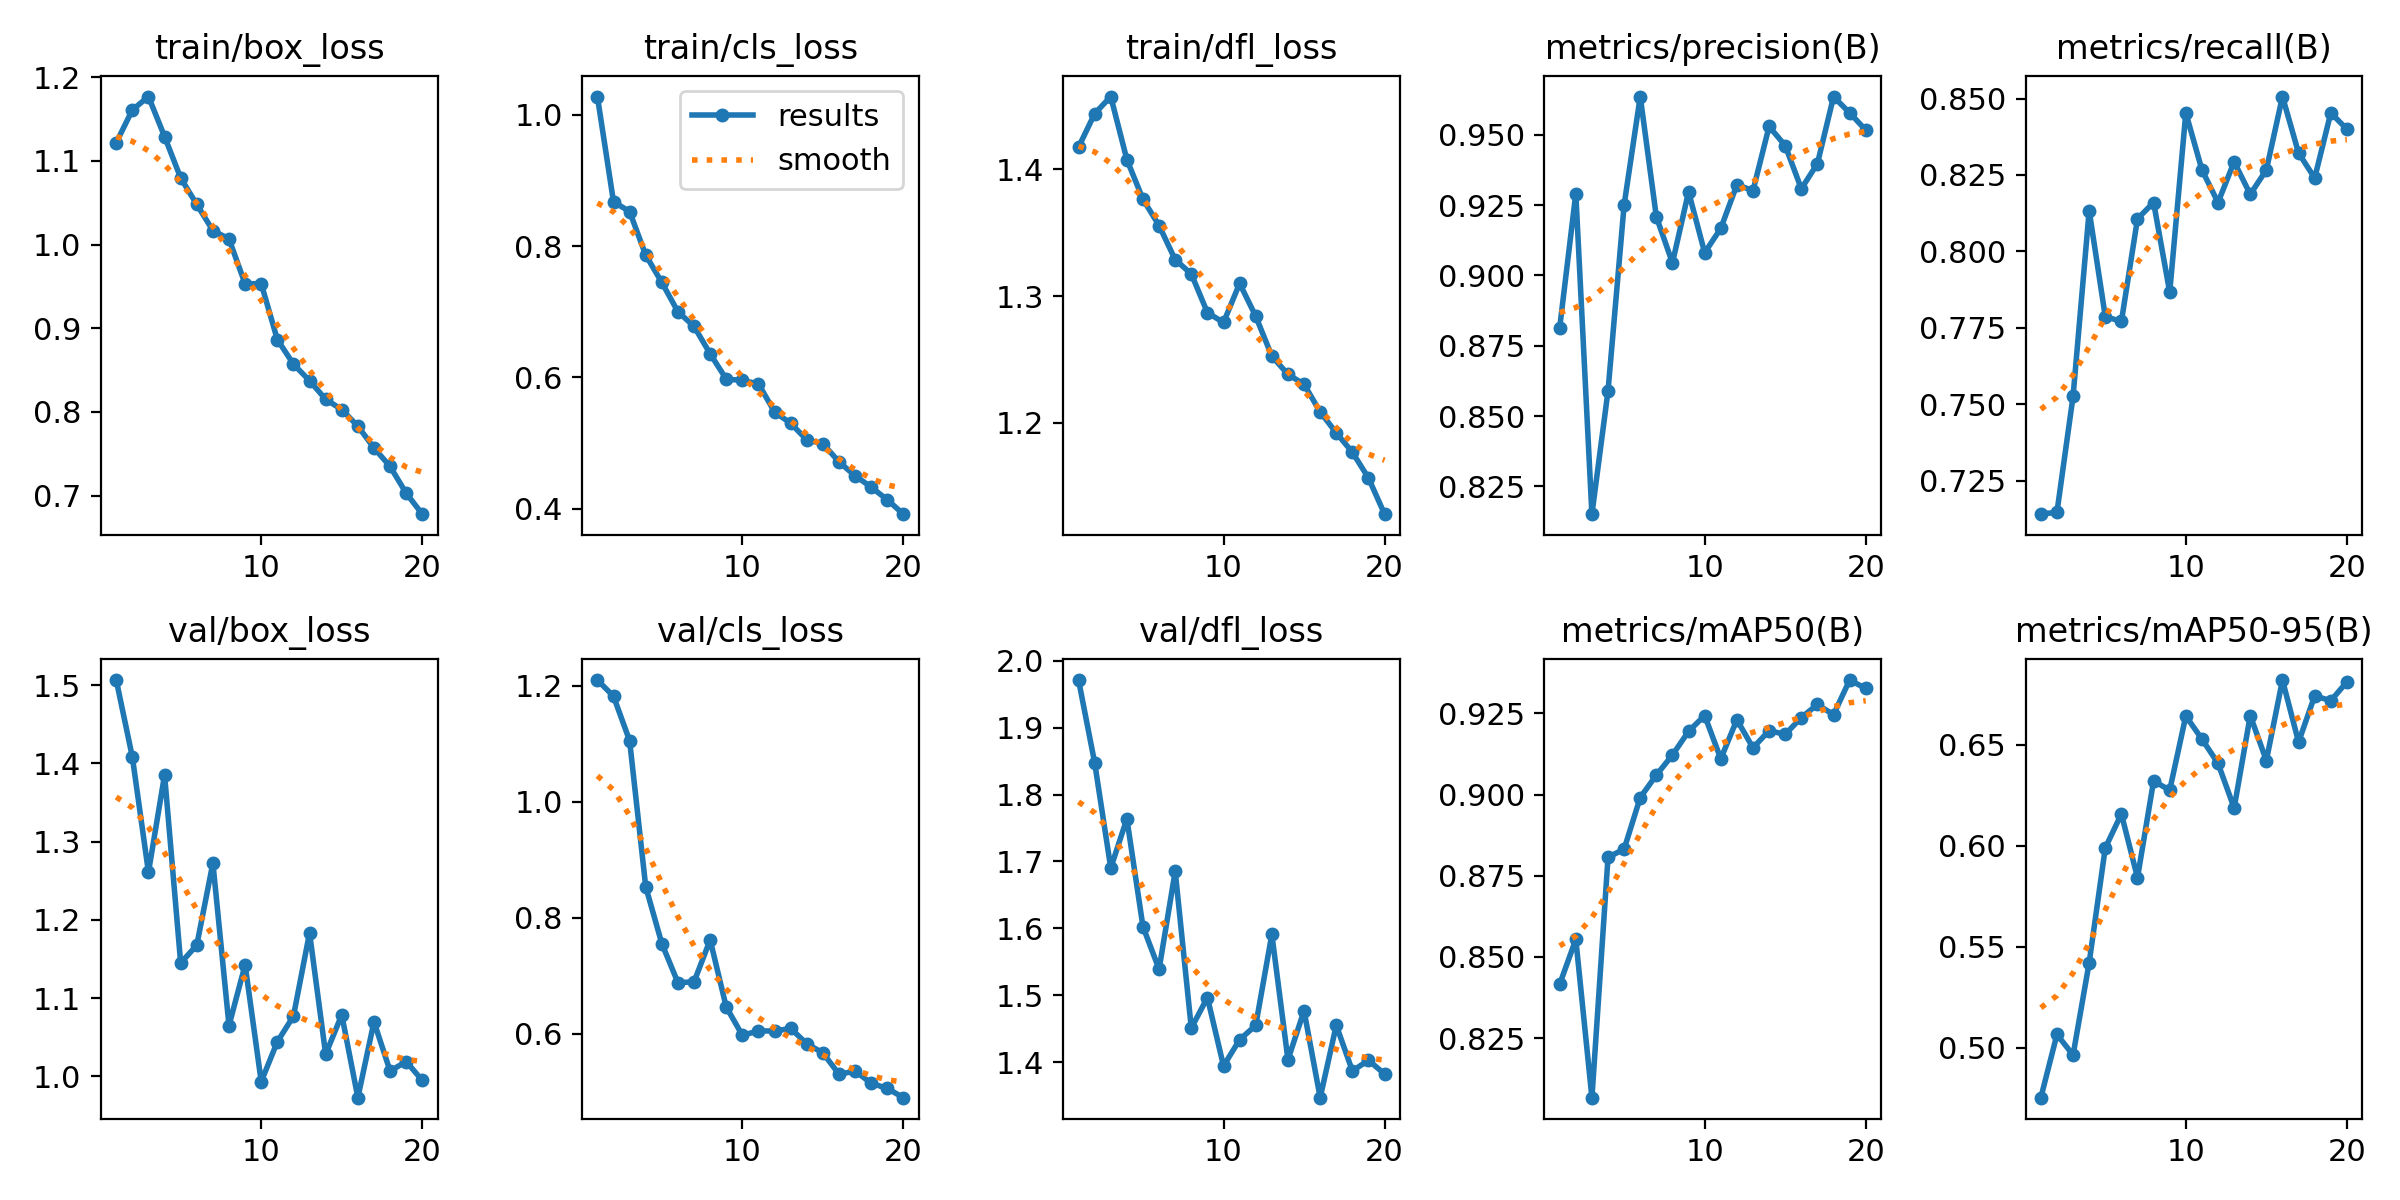

In [ ]:
Image(filename='/content/runs/detect/train2/results.png', height=600)